In [1]:
from copy import deepcopy
import csv
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
from matplotlib.backends.backend_pdf import PdfPages
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

## PoliGraph Analysis

In [2]:
from copy import deepcopy
import csv
import sys
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import matplotlib.ticker as mtick
#matplotlib.use('Agg')
matplotlib.rc('font', family='DejaVu Sans', stretch="condensed")

In [3]:
df = pd.read_csv("stats/edge_stats.csv")

In [4]:
pdf_backend = PdfPages('result-policy.pdf')

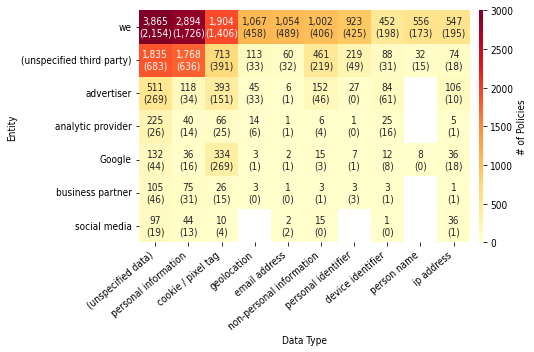

In [5]:
top_entities = [
    "we",
    "UNSPECIFIC_ACTOR",
    "advertiser",
    "analytic provider",
    "Google",
    "business partner",
    "social media",
]

top_datatypes = [
    "UNSPECIFIC_DATA",
    "personal information",
    "cookie / pixel tag",
    "geolocation",
    "email address",
    "non-personal information",
    "personal identifier",
    "device identifier",
    "person name",
    "ip address",
]

fontsize = 'medium'

tmp_df = df[df.u.isin(top_entities) & df.v.isin(top_datatypes) & (df.rel == "COLLECT")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[top_entities, top_datatypes]
pv_table_purpose = pd.pivot_table(tmp_df, values="purpose_count", index="u", columns="v")
pv_table_purpose = pv_table_purpose.loc[top_entities, top_datatypes]

fig = plt.figure(figsize=(8, 5.0))

labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
labels = labels + "\n" + pv_table_purpose.fillna(0).applymap(lambda x: ("({:,})".format(int(x))))

ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=3000,
    annot_kws={'size': "medium"},
    cbar_kws={'shrink': 1.0, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

x_ticks = []
for tick in ax.xaxis.get_major_ticks():
    if tick.label.get_text() == "UNSPECIFIC_DATA":
        x_ticks.append('(unspecified data)')
    else:
        x_ticks.append(tick.label.get_text())
ax.set_xticklabels(x_ticks)

y_ticks = []
for tick in ax.yaxis.get_major_ticks():
    if tick.label.get_text() == "UNSPECIFIC_ACTOR":
        y_ticks.append('(unspecified third party)')
    else:
        y_ticks.append(tick.label.get_text())
ax.set_yticklabels(y_ticks)

ax.set_xlabel("Data Type")
ax.set_ylabel("Entity")
fig.set_tight_layout(True)
#fig.savefig("figs/collect-edge-heatmap.pdf")
pdf_backend.savefig()

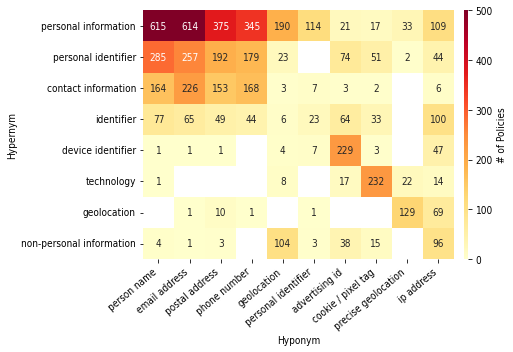

In [6]:
top_upper = [
    "personal information",
    "personal identifier",
    "contact information",
    "identifier",
    "device identifier",
    "technology",
    "geolocation",
    "non-personal information",
]

top_lower = [
    "person name",
    "email address",
    "postal address",
    "phone number",
    "geolocation",
    "personal identifier",
    "advertising id",
    "cookie / pixel tag",
    "precise geolocation",
    "ip address",
]

fontsize = 'medium'

tmp_df = df[df.u.isin(top_upper) & df.v.isin(top_lower) & (df.rel == "SUBSUM")]
pv_table = pd.pivot_table(tmp_df, values="count", index="u", columns="v")
pv_table = pv_table.loc[top_upper, top_lower]
fig = plt.figure(figsize=(8, 5.0))
labels = pv_table.fillna(0).applymap(lambda x: ("{:,}".format(int(x))))
ax = sns.heatmap(pv_table, cmap='YlOrRd', annot=labels, square=True, vmin=0, vmax=500,
    annot_kws={'size': "medium"},
    cbar_kws={'shrink': 1.0, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_xlabel("Hyponym")
ax.set_ylabel("Hypernym")
fig.set_tight_layout(True)
#fig.savefig("figs/subsum-edge-heatmap.pdf")
pdf_backend.savefig()

## Inferences

In [7]:
entity_order = ["advertiser", "analytic provider", "social media", "content provider", "auth provider", "email service provider", "(unspecified third party)"]
datatype_order = ["government identifier", "contact information", "software identifier", "hardware identifier", "protected classification",  "biometric information", "geolocation",  "internet activity", "(unspecified data)"]

entity_stats = pd.read_csv("stats/entity_stats.csv", index_col=0)
entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecified third party)'}, index={'UNSPECIFIC_DATA': '(unspecified data)'}, inplace=True)
total_collection = entity_stats["total"]

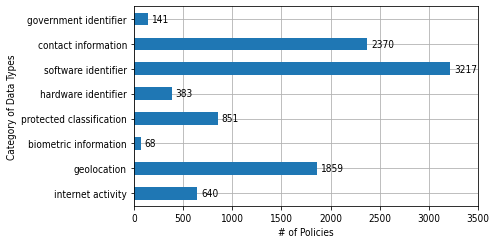

In [8]:
fig = plt.figure(figsize=(7, 3.5))
ax = total_collection.loc[datatype_order[::-1]].drop("(unspecified data)").plot.barh()
ax.bar_label(ax.containers[0], padding = 4)

ax.set_xlim(0, 3500)
ax.set_axisbelow(True)
ax.grid()
ax.set_xlabel("# of Policies")
ax.set_ylabel("Category of Data Types")
fig.set_tight_layout(True)
#fig.savefig("figs/stat_collection.pdf")
pdf_backend.savefig()

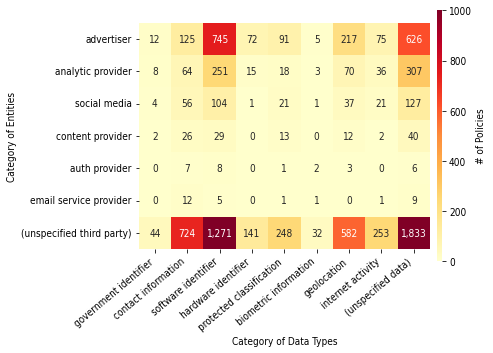

In [9]:
#ext_entity_stats = pd.read_csv("stats/ext_entity_stats.csv", index_col=0)
#ext_entity_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)
#ext_entity_stats = ext_entity_stats.loc[datatype_order, entity_order]

tmp_df = entity_stats.loc[datatype_order, entity_order].T.copy()
#tmp_df2 = ext_entity_stats.copy()

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(7, 7))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=1000,
                 cbar_kws={'shrink': 0.52, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Category of Entities")
ax.set_xlabel("Category of Data Types")
fig.set_tight_layout(True)
#fig.savefig("figs/data-sharing-heatmap.pdf")
pdf_backend.savefig()

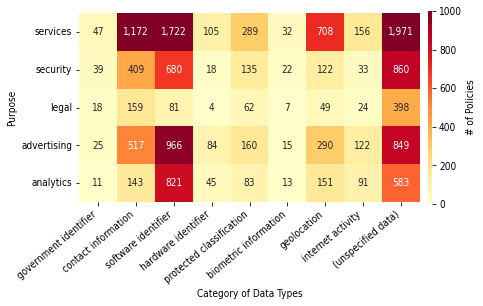

In [10]:
purpose_stats = pd.read_csv("stats/purpose_stats.csv", index_col=0)
purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecified third party)'}, index={'UNSPECIFIC_DATA': '(unspecified data)'}, inplace=True)
#ext_purpose_stats = pd.read_csv("stats/ext_purpose_stats.csv", index_col=0)
#ext_purpose_stats.rename(columns={'UNSPECIFIC_ACTOR': '(unspecific entity)'}, index={'UNSPECIFIC_DATA': '(unspecific data)'}, inplace=True)

tmp_df = purpose_stats.loc[datatype_order, :].T
#tmp_df2 = ext_purpose_stats.loc[datatype_order, :]

labels = tmp_df.applymap(lambda x: ("{:,}".format(int(x))))
#labels = labels + "\n" + tmp_df2.applymap(lambda x: ("({:,})".format(int(x))))

fig = plt.figure(figsize=(7, 7))
ax = sns.heatmap(tmp_df, cmap='YlOrRd', annot=labels, square=True, annot_kws={'size': "medium"},
                 vmin=0.0, vmax=1000.0,
                 cbar_kws={'shrink': 0.4, 'aspect': 50, 'pad': 0.02}, fmt="")

colorbar = ax.collections[0].colorbar
colorbar.ax.tick_params(labelsize=fontsize)
colorbar.ax.set_ylabel('# of Policies', size=fontsize)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size=fontsize)

ax.set_ylabel("Purpose")
ax.set_xlabel("Category of Data Types")
fig.set_tight_layout(True)

#fig.savefig("figs/data-purpose-heatmap.pdf")
pdf_backend.savefig()

In [11]:
pdf_backend.close()